# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.1. Download Dataset

If you want to know how data has been saved in pickle file: see this [ipynb file](https://drive.google.com/file/d/1ZQUVBzgH7N2EbiyE3WTPx7JNe2eRTs36/view?usp=sharing)

In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1lTD6bgRkmwguGAr30v-r0KBPdtnVneLb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.pkl')  

id = '1pCUdlZMoj99UZHtqFeza86fvVQfFmDFX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.pkl')  

import pickle
training_data = pickle.load(open("training_data.pkl","rb"))
testing_data = pickle.load(open("testing_data.pkl","rb"))

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data[0][0], training_data[0][1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 8000
Size of testing dataset: 2000
------------------------------------
------------------------------------
Sample Data
LABEL: neg / SENTENCE: hopeless for tmr :(
------------------------------------


## 1.2. Preprocess data



*You are required to describe which data preprocessing techniques were conducted with justification of your decision. *

The major techniques in the following part for preprocessing are the regular expression method for check and filter strings from documents, and tokenize methods for spliting each word as tokens, and use lemmatization method for get the base form of words, then use stemming method reduce tokens to their stems in information retrieval.


---
This is a text dataset comes from Twitter composed by text included different punctuation, different language, and soome unimformative words, like the web links, emails links, mentions(@) punctuations and numbers. I would remove these information for better training samples. First, lowercase all the tokens, remove emails, webs and mentions links. I would retain hasgtags because sometimes it might also contain the sentitive information. Besides, although not always, but most of time some emoji might contain information as well, like 'heart', ':)' simle might stand for a positive emotion, so I would use [emoji] package to transfer image emoji to words forms, replace word emoji like ':)' as word 'simleface'. [TweetTokenizer] can helps to split these word emoji. Third, I would try to only retain Enlish lowercase words for training sample, so I use language code on regular expression method to remove other languages. Finally, I would remove stop words which also not contain much information. Stemming is for normalize spelling words, because the text on the Internet might not much well-spelling and reduce the number of different words. Lemmatization ir for reduce the number of dimension for belowing word embedding.


In [2]:
# Please comment your code
import numpy as np
import pandas as pd
import re, string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# check duplicated print("train duplicated:", np.sum(pd.DataFrame(training_data).duplicated()), "test duplicated:", np.sum(pd.DataFrame(testing_data).duplicated()))

# check/remove na print(np.sum(pd.DataFrame(training_data).isna()), np.sum(pd.DataFrame(testing_data).isna()))

train duplicated: 0 test duplicated: 0
0    0
1    0
dtype: int64 0    0
1    0
dtype: int64


In [3]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√',  '╲', '╱', ]

def remove_punctuation(x):
  """
  Input: single word
  Output: justified word
  """
  x = str(x)
  for punct in puncts:
      if punct == x:
          x = x.replace(punct, '')
  return x

In [4]:
# Prepare Tokenisation
from nltk.tokenize import TweetTokenizer
# Remove username handles and Normalize word lengthening
tknzr = TweetTokenizer(strip_handles=True, reduce_len = True)
# Prepare removing stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
stop_words = sw.words()
# Prepare NLTK Wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import *
stemmer = PorterStemmer()
!pip install emoji
import emoji

def Clean(sentence):
  """
  Input sentence: 'hopeless for tmr :(' (e.g.)
  Output tokens: ['hopeless', 'tmr', 'cryface'] (e.g.)

  """
  # Converting to lowercase
  sentence = str(sentence[1]).lower()
  # Remove links
  remove_link = re.sub(r'http\S+', '', sentence)
  # Remove email
  remove_email = re.sub(r'@', '', remove_link)
  # Remove other language instead of English
  remove_lang = re.sub(u'\u0061-\u007a', '', remove_email)
  # Remove image emoji and change into words
  remove_emoji = emoji.demojize(remove_lang)
  # Remove numbers
  remove_num = re.sub('[0-9]+', "", remove_emoji)

  # Tokenisation
  tokens = tknzr.tokenize(remove_num)
  # Remove stop words
  filtered_sentence = [w for w in tokens if not w in stop_words]
  # lemmatizer
  lemm = [lemmatizer.lemmatize(word) for word in filtered_sentence]
  # Remove single punctuation
  repl_punc = [remove_punctuation(x) for x in lemm]
  remove_punc = [x for x in repl_punc if x != '']
  # stemmer
  stemm = [stemmer.stem(w) for w in remove_punc]
  # change word emoji into word describtion
  sent = [w.replace(r':(',"cryface").replace(r':-(',"cryface").replace(r':)',"simleface").replace(r':-)',"simleface") for w in stemm]
  
    
  return sent

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
def Encode_y(dataset):
  """
  Input the original label: "pos","neg"
  Output: "pos" <- 2, "neg" <- 1.
  """
  labels = []
  for i in range(len(dataset)):
    label = dataset[i][0]
    label = label.replace(r'neg','1').replace(r'pos','2')
    
    labels.append(label)

  for x in labels:
    if type(x) == 'str':
      ptint(x)
    else:
      pass
  encoded = [int(x) for x in labels]

  return encoded


In [6]:
train_x = [Clean(sentences) for sentences in training_data]
train_y = Encode_y(training_data)

test_x = [Clean(sentences) for sentences in testing_data]
test_y = Encode_y(testing_data)

# 2 - Model Implementation

## 2.1. Word Embeddings

*You are required to describe which model was implemented (i.e. Word2Vec with CBOW, FastText with SkipGram, etc.) with justification of your decision *

  First at all, I choose FastText to do word embedding in this part. This is 
becasue compared with Word2Vec and CBOW are predicting context, FastText is 
predicting the labels. In this case, out goal is to get the classification of sensitive label, so I choose FastText as the word embedding technique. In addition, word2vec has a huge limitation，it cannot infer the unfamiliar word vector if using the other corpus. This is OOV problem.


---



  However, FastText trained a large corpus would take a long time. In a ddition, if we train Word2Vec by corpus with the raw training data and testing data, the OOV problem can be avoid.


---


  Therefore, I will train Word2Vec with TED talk data (processed from Lab02) and Twitter dataset as the word embedding method at the following part.




In [7]:
# Please comment your code

import pprint
from gensim.models import Word2Vec
from gensim.models import FastText
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# test
# ft_sg_model = FastText(train_x, size=100, window=5, min_count=5, workers=2, sg=1)
# just for test: result=ft_sg_model.wv.most_similar("hopeless") pprint.pprint(result)

### 2.1.1. Data Preprocessing for Word Embeddings

*You are required to describe which preprocessing techniques were used with justification of your decision.*

The only preprocessing in this part is for TED talk dataset. First, download it which si a xml file. Then, remove the unimformational words. Finally, get a token form list by each sentence.

In [8]:
# Please comment your code
# ref: Lab 02 
# Download TED talk: about 55s nedded
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# For parsing our XML data
from lxml import etree 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 

downloaded.GetContentFile('ted_en-20160408.xml')  
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
ted_sentences=[]
ted_sentences=[word_tokenize(sentence) for sentence in normalized_text]

#test:    print(ted_sentences[0])

In [61]:
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')
twitter_samples.fileids()
tweets = twitter_samples.strings('tweets.20150430-223406.json')
tweets_tokens = twitter_samples.tokenized('tweets.20150430-223406.json')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [95]:
def Cleantw(sent):
  clean_tweets = []
  for i in sent:
    #print(i.lower())
    x = re.sub(r'http\S+', '', i.lower())
    x = re.sub(r'@', '', x)
    x = re.sub(u'\u0061-\u007a', '', x)
    # Remove image emoji and change into words
    x = emoji.demojize(x)
    # Remove numbers
    x = re.sub('[0-9]+', '', x)
    x = remove_punctuation(x)
    if x not in stop_words:
      
      x = lemmatizer.lemmatize(x)
      x = stemmer.stem(x)
      clean_tweets.append(x)
      
  cleaned_tweets = []
  for i in clean_tweets:
    if i != '':
      cleaned_tweets.append(i)
  return cleaned_tweets    


In [96]:
cleantw = [Cleantw(sent) for sent in tweets_tokens]

In [97]:
len(cleantw)

20000

### 2.1.2. Build Word Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

There are many parameters need to set up in [gensim.models.word2vec.Word2Vec]. 

{
  
  sg: for set up algorithm, 0 is cbow, 1 is skip-gram 

  size: the dimension of vetor, 100 is default.

  alpha: learning rate, 0.025 is default, set double 0.05 for shorter running time

  min_alpha: minimum learning rate, 0.0001 is defualt

  window: the distance between current word and predicted word in a stence, 5 is default.

  min_count: can cut off the dictionary, if the frequence of words less then min_count, it would be drop off, 5 is default, however, the dataset we used is not very large, I want more accurate so I set 1 here. The most important point is that 1 can help avoid OOV problem.

  seed: randomly begin. set any number.

  workers: control the number of parallel, 3 as default.

  negative: if larger than 0, negative sampling would be took for noise words. 5 is default. I would use hierarchical softmax method instead of negative sampling, so set 0 here.

  hs: 0: negative sampling, 1:hierarchical softmax. Hierarchical is based on the binary tree, so high-frequency words need less time can be found according to greedy optimization. Therefore, set 1.

  compute_loss: TRUE, because I want to use [get_latest_training_loss()] below to check loss.

  iter: 5 is default. I want more train times, so set 10.

  cbow_mean: 0 is the sum of context, 1 is default that use mean value, becasue I use cbow algorithm here, so need to set this parameter.

}


ref: https://radimrehurek.com/gensim/models/word2vec.html
(code) https://github.com/RaRe-Technologies/gensim/issues/2039

In [148]:
# Please comment your code
# hyperparameters prepare
Dimension_embeddings = 100
word2vec_params = {
   'sg': 0,       # CBOW
   "size": Dimension_embeddings,
   "alpha": 0.5,
   "min_alpha": 0.001,
   'window': 10,
   'min_count': 1,
   'seed': 1,
   "workers": 4,
   "negative": 0,
   "hs": 1,       # hierarchical softmax
   'compute_loss': True,
   'iter': 10,
   'cbow_mean':1,
}
model = Word2Vec(**word2vec_params)
model.build_vocab(cleantw+ted_sentences+train_x+test_x)

### 2.1.3. Train Word Embeddings Model

0 69473.6875 0.5
1 71894.0625 0.4501
2 72277.625 0.4002
3 71113.625 0.3503
4 69156.6953125 0.3004
5 68274.3359375 0.2505
6 67462.640625 0.2006
7 70214.65625 0.1507
8 71730.6328125 0.1008
9 66688.1953125 0.0509


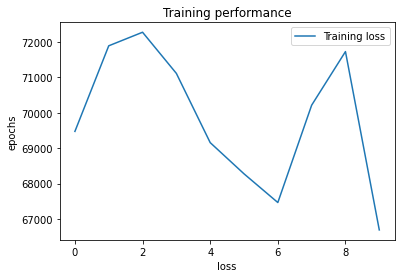

In [150]:
# Please comment your code
# about 53s needed
from matplotlib import pyplot as plt 

learning_rate = 0.5
step_size = (0.5 - 0.001) / 10

W2V_x = []
W2V_y = []

for i in range(10):
    trained_word_count, raw_word_count = model.train(cleantw+ted_sentences+train_x+test_x, compute_loss=True,
                                                     start_alpha=learning_rate,
                                                     end_alpha=learning_rate,
                                                     total_examples=model.corpus_count,
                                                     epochs=5)
    loss = model.get_latest_training_loss()
    
    print(i, loss, learning_rate)
    W2V_x.append(i) # for plot
    W2V_y.append(loss) # for plot
    
    learning_rate -= step_size

plt.title("Training performance")
plt.plot(W2V_x, W2V_y, label='Training loss')
plt.legend()
plt.xlabel("loss")
plt.ylabel("epochs")
plt.show()

In [151]:
#save the model
model.save("word2vec.model")

#load the model
loaded_w2vmodel = Word2Vec.load("word2vec.model")

In [152]:
def get_embedding(sent):
  Word2Vec_embedding = []
  for token in sent:
    Word2Vec_embedding.append(loaded_w2vmodel.wv[token])
  return np.array(Word2Vec_embedding)

In [153]:
train_W2V_embedding = [get_embedding(train_x[token]) for token in range(len(train_x))]
test_W2V_embedding = [get_embedding(test_x[token]) for token in range(len(test_x))]

## 2.2. Lexicon Embeddings

### 2.2.1. Lexicon-based Embedding

*[Optional] You are required to describe why you would like to use more than one-dimensional embedding.*

In [ ]:
# Please comment your code
###
# if you want to use uploaded file, run this chunk. I am using the corpus from nltk, so run and import in the next chunk.
###

#lexi_negative = open('/content/opinion-lexicon-English/negative-words.txt', 'r', encoding = "ISO-8859-1") 
#lexi_positive = open('/content/opinion-lexicon-English/positive-words.txt', 'r', encoding = "ISO-8859-1") 
#negative = lexi_negative.read()
#positive = lexi_positive.read()
#negative_list = [negative.split( )][0]
#positive_list = [positive.split( )][0]

### this step is to find the introduction words 
### and get the begin index of usable words

#tmp_nidx = []
#for i in range(len(negative_list)):
#  if ";" in negative_list[i]:
    #print(i)
#    tmp_nidx.append(i)
#max_n = np.max(tmp_nidx)

#tmp_pidx = []
#for i in range(len(positive_list)):
#  if ";" in positive_list[i]:
    #print(i)
#    tmp_pidx.append(i)
#max_p = np.max(tmp_pidx)

#negative_lexi = negative_list[int(max_n + 1):]

#positive_lexi = positive_list[int(max_p + 1):]


In [154]:
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

lexi_negative = opinion_lexicon.negative()
lexi_positive = opinion_lexicon.positive()
print("lexi_negative:",len(lexi_negative), "lexi_positive:",len(lexi_positive)) # lexi_negative: 4783 lexi_positive: 2006 is correct

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
lexi_negative: 4783 lexi_positive: 2006


In [155]:
stemm_negative_lexi = [stemmer.stem(w) for w in lexi_negative]
stemm_positive_lexi = [stemmer.stem(w) for w in lexi_positive]
# This is because the lexi corpus words are official version, 
# so in order to match the stemmized processed tokens, it should be stemmized as well.

In [17]:
# test: train_x[0]

In [156]:
def Encode_lexi(token_list):
  lexi_token = []
  for token in token_list:
    if token in stemm_negative_lexi:
      lexi_token.append(1) # negative(1)
    elif token in stemm_positive_lexi:
      lexi_token.append(2) # positive(2)
    else:
      lexi_token.append(0) # not_exist(0)

  return lexi_token

In [157]:
train_lexi_code = [Encode_lexi(train_x[document]) for document in range(len(train_x))]
test_lexi_code = [Encode_lexi(test_x[document]) for document in range(len(test_x))]
np.array(train_lexi_code).shape # because now each document is different length, so the dimension is not shown here

(8000,)

## 2.3. Bi-directional RNN Sequence model

### 2.3.1. Apply/Import Word Embedding and Lexicon Embedding

In [158]:
# Please comment your code
def Padding(embeddinged):
  length = int(np.mean([len(i) for i in embeddinged]))
  max_length = int(np.max([len(i) for i in embeddinged]))
  zeros = np.zeros((max_length, Dimension_embeddings))

  padding = []
  for sent in embeddinged:
    if len(sent) >= length:
      padding.append(list(np.array(sent)[:length]))

    else:
      padding.append(list(np.vstack((zeros[:int(length - len(sent))],sent))))

    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
  padding = np.array(padding)

  return padding


In [159]:
train_W2V = Padding(train_W2V_embedding)
test_W2V = Padding(test_W2V_embedding)  # test: print(train_W2V.shape, test_W2V.shape)

In [160]:
def Paddinglexi(embedding):
  length = int(np.mean([len(i) for i in embedding]))
  max_length = int(np.max([len(i) for i in embedding]))
  
  zeros = [0]*max_length

  lexi_padding = []
  for sent in embedding:
    if len(sent) >= length:
      lexi_padding.append(sent[:length])
    else:
      lexi_padding.append(sent+zeros[:int(length-len(sent))])

  lexi_padding = np.array(lexi_padding)

  return lexi_padding


In [161]:
train_lexi_padding = Paddinglexi(train_lexi_code)
test_lexi_padding = Paddinglexi(test_lexi_code)  # test: print(train_lexi_padding.shape, test_lexi_padding.shape)

In [162]:
import torch
import torch.nn as nn
def Concatenate(padding, padding_lexi, length, num_vector):
  
  concatenate = []
  for lexi in range(len(padding_lexi)):
    embedding = nn.Embedding(length,num_vector)
    input = torch.LongTensor(padding_lexi[lexi])
    concat = torch.cat((torch.from_numpy(padding[lexi]),embedding(input)), 0)
    #print(concat.shape)
    #print(concat.detach().numpy().shape)
    concatenate.append(concat.detach().numpy())
  concatenate = np.array(concatenate)
  return concatenate

In [163]:
train_input = Concatenate(train_W2V, train_lexi_padding, 7, Dimension_embeddings)
test_input = Concatenate(test_W2V, test_lexi_padding, 7, Dimension_embeddings)  # test: print(train_input.shape, test_input.shape)

In [164]:
train_y = np.array(train_y)
test_y = np.array(test_y)  # test: print(train_y.shape, test_y.shape)

### 2.3.2. Build Sequence Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

In [165]:
# Please comment your code
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [166]:
import torch.nn as nn
import torch.nn.functional as F

num_directions = 2
num_layers = 2  # 2 Bi-RNN here 

class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()

        # input of shape (seq_len, batch, input_size)
        # h_0 of shape (num_layers * num_directions, batch, hidden_size)
        # bidirectional – If True, becomes a bidirectional RNN. Default: False
        # If the RNN is bidirectional, num_directions should be 2, else it should be 1.

        self.rnn = nn.RNN(n_input, n_hidden, num_layers = num_layers, batch_first=True, dropout=0.2, bidirectional = True)     
        self.linear = nn.Linear(n_hidden*num_directions, n_class+1)

    def forward(self, x):        

        # output of shape (seq_len, batch, num_directions * hidden_size)
        # h_n of shape (num_layers * num_directions, batch, hidden_size)

        rnn_output, h_n = self.rnn(x)

        # got (batch, hidden_size) and pop the last hidden states
        # rnn_output[:,-1,:128] <-- the last output of forward
        # rnn_output[:,0,-128:] <-- the last output of backward

        x_last = torch.cat((rnn_output[:,-1,:n_hidden],rnn_output[:,0,-n_hidden:]),dim = 1)
        
        output = self.linear(x_last)

        return output

In [145]:
import numpy as np
import torch.optim as optim

# the length of each sequence = 
seq_length = int(train_input.shape[1])
# the input feature dimension = 
n_input = int(train_input.shape[2])
# the number of class = 
n_class = 2

# the hyperparameters
n_hidden = 128
batch_size =  50
total_epoch = 50
learning_rate = 0.003

### 2.3.3. Train Sequence Model

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
# Please comment your code

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
                    train_input, train_y, test_size=0.33, random_state=1442)


In [172]:
from sklearn.metrics import accuracy_score

model = Bi_RNN_Model().to(device)
criterion = nn.CrossEntropyLoss()

# Please find which optimizer provides a higher f1
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,X_train.shape[0],batch_size):
        input_batch = X_train[ind:min(ind+batch_size, X_train.shape[0])]
        target_batch = y_train[ind:min(ind+batch_size, X_train.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())
        
        train_loss += loss.item()

    print('Epoch: %d, train loss: %.5f, train_acc: %.2f'%(epoch + 1, train_loss, acc))

print('Finished Training')


Epoch: 1, train loss: 63.69012, train_acc: 0.90
Epoch: 2, train loss: 36.55801, train_acc: 0.80
Epoch: 3, train loss: 34.26443, train_acc: 0.60
Epoch: 4, train loss: 36.21677, train_acc: 0.90
Epoch: 5, train loss: 31.35741, train_acc: 0.90
Epoch: 6, train loss: 32.10292, train_acc: 0.90
Epoch: 7, train loss: 31.33810, train_acc: 0.90
Epoch: 8, train loss: 26.84082, train_acc: 0.90
Epoch: 9, train loss: 27.82705, train_acc: 1.00
Epoch: 10, train loss: 28.36945, train_acc: 1.00
Epoch: 11, train loss: 27.48341, train_acc: 1.00
Epoch: 12, train loss: 26.72350, train_acc: 1.00
Epoch: 13, train loss: 23.10744, train_acc: 1.00
Epoch: 14, train loss: 20.79539, train_acc: 1.00
Epoch: 15, train loss: 17.99434, train_acc: 1.00
Epoch: 16, train loss: 16.60524, train_acc: 1.00
Epoch: 17, train loss: 15.59289, train_acc: 0.90
Epoch: 18, train loss: 18.00295, train_acc: 1.00
Epoch: 19, train loss: 15.44090, train_acc: 1.00
Epoch: 20, train loss: 14.85461, train_acc: 1.00
Epoch: 21, train loss: 14.746

In [173]:
## Prediction
model.eval()
outputs = model(torch.from_numpy(X_val).float().to(device)) 
predicted = torch.argmax(outputs, 1)

# classification_report builds a text report showing the main classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_val, predicted.cpu().numpy(),digits=4))

              precision    recall  f1-score   support

           1     0.8164    0.8046    0.8104      1315
           2     0.8088    0.8204    0.8145      1325

    accuracy                         0.8125      2640
   macro avg     0.8126    0.8125    0.8125      2640
weighted avg     0.8126    0.8125    0.8125      2640



# 3 - Evaluation


## 3.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [32]:
# Please comment your code
# hyperparameters prepare
def getfile(dim, window):
  Dimension_embeddings = dim
  word2vec_params = {
    'sg': 0,       # CBOW
    "size": Dimension_embeddings,
    "alpha": 0.05,
    "min_alpha": 0.0001,
    'window': window,
    'min_count': 2,
    'seed': 1,
    "workers": 4,
    "negative": 0,
    "hs": 1,       # hierarchical softmax
    'compute_loss': True,
    'iter': 10,
    'cbow_mean':1,
  }
  model = Word2Vec(**word2vec_params)
  model.build_vocab(ted_sentences+train_x+test_x)

  losses = []
  learning_rate = 0.5
  step_size = (0.5 - 0.001) / 10

  for i in range(10):
      trained_word_count, raw_word_count = model.train(ted_sentences+train_x+test_x, compute_loss=True,
                                                      start_alpha=learning_rate,
                                                      end_alpha=learning_rate,
                                                      total_examples=model.corpus_count,
                                                      epochs=5)
      loss = model.get_latest_training_loss()
      losses.append(loss)
      print(i, loss, learning_rate)
      
      learning_rate -= step_size

  return model

In [47]:
loaded_w2vmodel.wv.save_word2vec_format('cbow_w2v.txt', binary=False)
ofile = "/content/cbow_w2v.txt"

In [33]:
getfile(200, 5).wv.save_word2vec_format('cbow_w2v2.txt', binary=False)
file2 = "/content/cbow_w2v2.txt"

0 139253.875 0.5
1 79205.609375 0.4501
2 73981.984375 0.4002
3 76228.421875 0.3503
4 79613.0078125 0.3004
5 75639.3984375 0.2505
6 72999.71875 0.2006
7 72512.5234375 0.1507
8 72980.5625 0.1008
9 77856.9375 0.0509


In [34]:
getfile(300, 5).wv.save_word2vec_format('cbow_w2v3.txt', binary=False)
file3 = "/content/cbow_w2v3.txt"

0 187072.546875 0.5
1 77459.2734375 0.4501
2 77861.015625 0.4002
3 74688.4296875 0.3503
4 75916.9140625 0.3004
5 72696.109375 0.2505
6 72054.609375 0.2006
7 72795.1875 0.1507
8 68752.4453125 0.1008
9 71864.234375 0.0509


In [45]:
getfile(50, 5).wv.save_word2vec_format('cbow_w2v4.txt', binary=False)
file4 = "/content/cbow_w2v4.txt"

0 156137.484375 0.5
1 78996.8203125 0.4501
2 76894.3203125 0.4002
3 74469.734375 0.3503
4 74225.9140625 0.3004
5 73558.09375 0.2505
6 74865.1015625 0.2006
7 72223.21875 0.1507
8 74269.0390625 0.1008
9 71925.9296875 0.0509


In [55]:
getfile(100, 10).wv.save_word2vec_format('cbow_w2v5.txt', binary=False)
file5 = "/content/cbow_w2v5.txt"

0 130379.4765625 0.5
1 81311.0703125 0.4501
2 73978.3828125 0.4002
3 75391.6015625 0.3503
4 74657.1796875 0.3004
5 73257.7734375 0.2505
6 75173.9453125 0.2006
7 72767.3359375 0.1507
8 71219.1484375 0.1008
9 72271.1796875 0.0509


In [35]:
!git clone https://github.com/stanfordnlp/GloVe.git

Cloning into 'GloVe'...
remote: Enumerating objects: 595, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 595 (delta 0), reused 1 (delta 0), pack-reused 592
Receiving objects: 100% (595/595), 222.33 KiB | 940.00 KiB/s, done.
Resolving deltas: 100% (338/338), done.


In [40]:
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

In [52]:
def process(file):
  with open(file, 'r') as f:
    vectors = {}
    for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line
        
      vals = line.rstrip().split(' ')
      try:
        vectors[vals[0]] = [float(x) for x in vals[1:]]
      except ValueError:
        break

  vocab_words=list(vectors.keys())
  vocab_size = len(vocab_words)
  print("Vocab size: ",str(vocab_size))

  # create word->index and index->word converter
  vocab = {w: idx for idx, w in enumerate(vocab_words)}
  ivocab = {idx: w for idx, w in enumerate(vocab_words)}

  # create the embedding matrix of shape (vocab_size, dim)
  vector_dim = len(vectors[ivocab[0]])
  W = np.zeros((vocab_size, vector_dim))
  for word, v in vectors.items():
      if word == '<unk>':
          continue
      W[vocab[word], :] = v

  # normalize each word vector to unit length
  # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
  W_norm = np.zeros(W.shape)
  d = (np.sum(W ** 2, 1) ** (0.5))
  W_norm = (W.T / d).T

  correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, 
                                                                                                        vocab, prefix='/content/GloVe/eval/question-data')
  print('Questions seen/total: %.2f%% (%d/%d)' %
      (100 * count_tot / float(full_count), count_tot, full_count))
  print('Semantic accuracy: %.2f%%  (%i/%i)' %
      (100 * correct_sem / float(count_sem), correct_sem, count_sem))
  print('Syntactic accuracy: %.2f%%  (%i/%i)' %
      (100 * correct_syn / float(count_syn), correct_syn, count_syn))
  print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

  return 



  

In [53]:
process(ofile)  # (100,5)

Vocab size:  22433
capital-common-countries.txt:
ACCURACY TOP1: 0.00% (0/272)
capital-world.txt:
ACCURACY TOP1: 0.00% (0/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 0.00% (0/545)
family.txt:
ACCURACY TOP1: 0.00% (0/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 0.00% (0/812)
gram2-opposite.txt:
ACCURACY TOP1: 0.00% (0/506)
gram3-comparative.txt:
ACCURACY TOP1: 0.08% (1/1332)
gram4-superlative.txt:
ACCURACY TOP1: 0.00% (0/756)
gram5-present-participle.txt:
ACCURACY TOP1: 0.00% (0/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.00% (0/849)
gram7-past-tense.txt:
ACCURACY TOP1: 0.00% (0/1482)
gram8-plural.txt:
ACCURACY TOP1: 0.10% (1/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/756)
Questions seen/total: 52.32% (10226/19544)
Semantic accuracy: 0.00%  (0/1749)
Syntactic accuracy: 0.02%  (2/8477)
Total accuracy: 0.02%  (2/10226)


In [42]:
process(file2)  # (200, 5)

Vocab size:  22433
capital-common-countries.txt:
ACCURACY TOP1: 0.00% (0/272)
capital-world.txt:
ACCURACY TOP1: 0.00% (0/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 0.18% (1/545)
family.txt:
ACCURACY TOP1: 0.00% (0/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 0.00% (0/812)
gram2-opposite.txt:
ACCURACY TOP1: 0.00% (0/506)
gram3-comparative.txt:
ACCURACY TOP1: 0.00% (0/1332)
gram4-superlative.txt:
ACCURACY TOP1: 0.00% (0/756)
gram5-present-participle.txt:
ACCURACY TOP1: 0.00% (0/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.00% (0/849)
gram7-past-tense.txt:
ACCURACY TOP1: 0.00% (0/1482)
gram8-plural.txt:
ACCURACY TOP1: 0.00% (0/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/756)
Questions seen/total: 52.32% (10226/19544)
Semantic accuracy: 0.06%  (1/1749)
Syntactic accuracy: 0.00%  (0/8477)
Total accuracy: 0.01%  (1/10226)


In [43]:
process(file3) # (300,5)

Vocab size:  22433
capital-common-countries.txt:
ACCURACY TOP1: 0.00% (0/272)
capital-world.txt:
ACCURACY TOP1: 0.00% (0/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 0.18% (1/545)
family.txt:
ACCURACY TOP1: 0.00% (0/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 0.12% (1/812)
gram2-opposite.txt:
ACCURACY TOP1: 0.00% (0/506)
gram3-comparative.txt:
ACCURACY TOP1: 0.08% (1/1332)
gram4-superlative.txt:
ACCURACY TOP1: 0.00% (0/756)
gram5-present-participle.txt:
ACCURACY TOP1: 0.00% (0/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.00% (0/849)
gram7-past-tense.txt:
ACCURACY TOP1: 0.00% (0/1482)
gram8-plural.txt:
ACCURACY TOP1: 0.00% (0/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/756)
Questions seen/total: 52.32% (10226/19544)
Semantic accuracy: 0.06%  (1/1749)
Syntactic accuracy: 0.02%  (2/8477)
Total accuracy: 0.03%  (3/10226)


In [46]:
process(file4) # (50,5)

Vocab size:  22433
capital-common-countries.txt:
ACCURACY TOP1: 0.00% (0/272)
capital-world.txt:
ACCURACY TOP1: 0.00% (0/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 0.00% (0/545)
family.txt:
ACCURACY TOP1: 0.00% (0/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 0.00% (0/812)
gram2-opposite.txt:
ACCURACY TOP1: 0.00% (0/506)
gram3-comparative.txt:
ACCURACY TOP1: 0.00% (0/1332)
gram4-superlative.txt:
ACCURACY TOP1: 0.00% (0/756)
gram5-present-participle.txt:
ACCURACY TOP1: 0.00% (0/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.00% (0/849)
gram7-past-tense.txt:
ACCURACY TOP1: 0.00% (0/1482)
gram8-plural.txt:
ACCURACY TOP1: 0.00% (0/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/756)
Questions seen/total: 52.32% (10226/19544)
Semantic accuracy: 0.00%  (0/1749)
Syntactic accuracy: 0.00%  (0/8477)
Total accuracy: 0.00%  (0/10226)


In [56]:
process(file5) # (100, 10)

Vocab size:  22433
capital-common-countries.txt:
ACCURACY TOP1: 0.00% (0/272)
capital-world.txt:
ACCURACY TOP1: 0.00% (0/562)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 0.00% (0/545)
family.txt:
ACCURACY TOP1: 0.00% (0/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 0.00% (0/812)
gram2-opposite.txt:
ACCURACY TOP1: 0.00% (0/506)
gram3-comparative.txt:
ACCURACY TOP1: 0.08% (1/1332)
gram4-superlative.txt:
ACCURACY TOP1: 0.00% (0/756)
gram5-present-participle.txt:
ACCURACY TOP1: 0.00% (0/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 0.00% (0/849)
gram7-past-tense.txt:
ACCURACY TOP1: 0.00% (0/1482)
gram8-plural.txt:
ACCURACY TOP1: 0.00% (0/992)
gram9-plural-verbs.txt:
ACCURACY TOP1: 0.00% (0/756)
Questions seen/total: 52.32% (10226/19544)
Semantic accuracy: 0.00%  (0/1749)
Syntactic accuracy: 0.01%  (1/8477)
Total accuracy: 0.01%  (1/10226)


## 3.2. Performance Evaluation


You are required to provide the table with precision, recall, f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
# Please comment your code

## 3.3. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
# Please comment your code

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section